<a href="https://colab.research.google.com/github/bassoline/FaceMaskDetection/blob/main/FaceMaskDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Split up test and training data

In [ ]:
import random
import os
import subprocess
import sys
import math 

image_dir = "../Face_Mask_Data"
f_val = open("../FaceMask_Code/face_mask_data_test.txt", 'w')
f_train = open("../FaceMask_Code/face_mask_data_train.txt", 'w')

path, dirs, files = next(os.walk(image_dir))
# we have text and images so we need to divide the files by 2
data_size = len(files)

ind = 0
data_test_size = int(0.1 * data_size)
test_array = random.sample(range(data_size), k=data_test_size)

for f in os.listdir(image_dir):
    if(f.split(".")[-1] == "jpg"):
        ind += 1
        
        if ind in test_array:
            f_val.write(image_dir+'/'+f+'\n')
        else:
            f_train.write(image_dir+'/'+f+'\n')

f_train.close()
f_val.close()
print('finished creating data sets')

finished creating data sets


## Validate that there are enough testing files

In [ ]:
import os

image_dir = "./Face_Mask_Data"
mask = 0 
no_mask = 0 
path, dirs, files = next(os.walk(image_dir))

for f in os.listdir(image_dir):
  if f.split(".")[-1] == "txt":
    count += 1
    # Using readlines() 
    with open(image_dir + '/' + f, 'r') as text_file:
      for line in text_file: 
        try:
          s = line.split()[0]
          i = int(s)
          if i == 0:
            mask += 1 
          elif i == 1: 
            no_mask += 1
        except:
          pass
print('mask:', mask)
print('no_mask', no_mask)

mask: 3253
no_mask 5804


# Clone & update settings for GPU and OpenCV & Build Darknet

In [1]:
cd drive/MyDrive/darknet/

/content/drive/MyDrive/darknet


In [2]:
# !git clone https://github.com/AlexeyAB/darknet.git
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make &> build_log.txt

# Train Yolo V4 

In [ ]:
# dont_show flag set since colab doesn't have a display and will crash 
# map flag calculates mAP (mean average percision for test data)
# don't forget to turn on the GPU now before running this

!./darknet detector train ../FaceMask_Code/yolov4/yolov4-face-mask-setup.data ../FaceMask_Code/yolov4/yolov4-face-mask-train.cfg ../FaceMask_Code/yolov4/backup/yolov4-face-mask-train_last.weights -dont_show -map 2> ../FaceMask_Code/yolov4/train_log.txt

# Train Yolo V3

In [ ]:
# dont_show flag set since colab doesn't have a display and will crash 
# map flag calculates mAP (mean average percision for test data)
# don't forget to turn on the GPU now before running this

!./darknet detector train ../FaceMask_Code/yolov3-face_mask-setup.data ../FaceMask_Code/yolov3-face_mask-train.cfg ../FaceMask_Code/backup_83/yolov3-face_mask-train_best.weights -dont_show -map 2> ../FaceMask_Code/train_log.txt

# Validation Common

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()
    

# Validation YoloV3

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 123 K-images (1 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
../FaceMask_Code/test-image1.jpg: Predicted in 82.472000 milli-seconds.
Mask: 100%


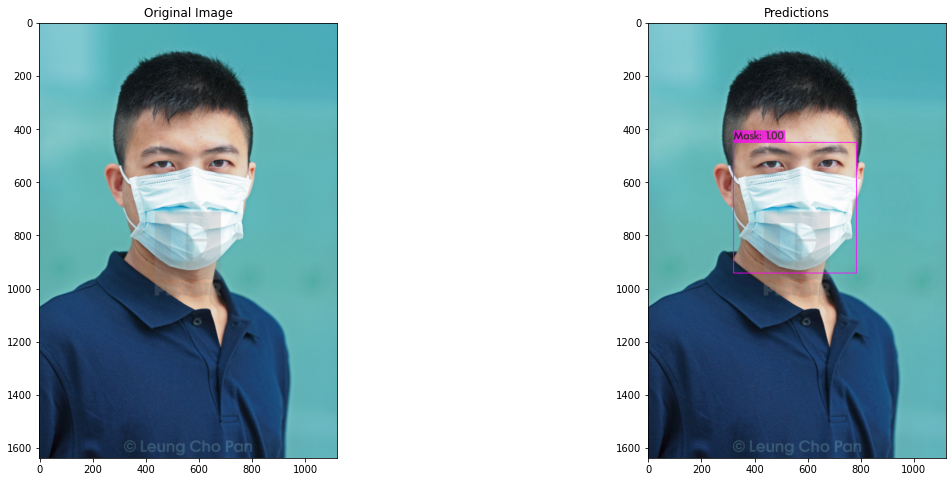

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 123 K-images (1 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
../FaceMask_Code/test-image2.jpg: Predicted in 82.397000 milli-seconds.
Mask: 99%
Mask: 86%
Mask: 73%
No Mask: 98%
Mask: 75%


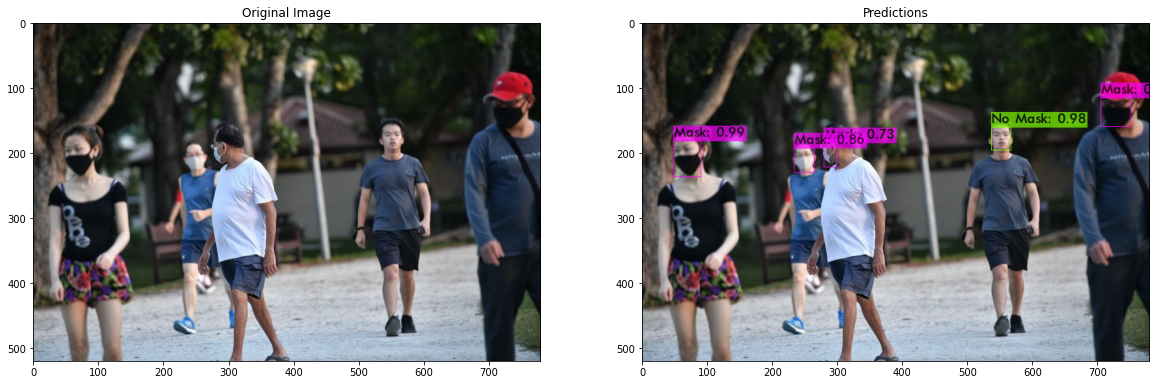

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 123 K-images (1 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
../FaceMask_Code/test-image3.jpg: Predicted in 82.449000 milli-seconds.
Mask: 99%
Mask: 58%
Mask: 97%
No Mask: 99%
Mask: 97%
Mask: 94%
Mask: 98%
Mask: 91%
Mask: 95%
Mask: 92%
Mask: 99%
Mask: 96%
Mask: 99%
Mask: 96%
Mask: 99%
Mask: 100%
Mask: 91%
Mask: 97%
Mask: 92%


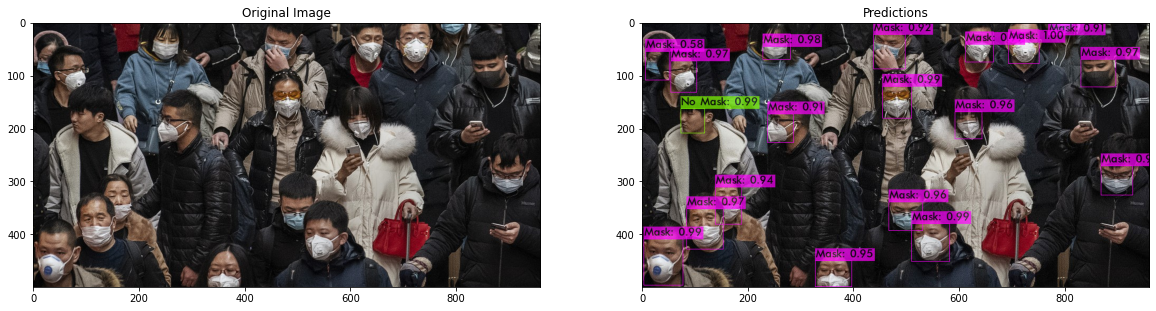

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 123 K-images (1 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
../FaceMask_Code/test-image4.jpg: Predicted in 82.288000 milli-seconds.
No Mask: 94%
No Mask: 64%
Mask: 99%
Mask: 95%
No Mask: 67%
Mask: 99%
No Mask: 91%
Mask: 98%


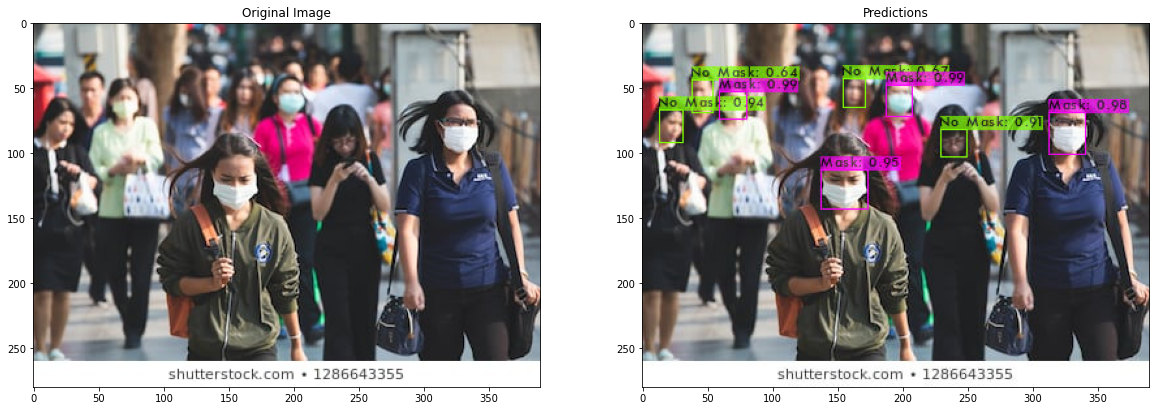

In [9]:
for i in range(1, 5):
  test_image = '../FaceMask_Code/test-image{}.jpg'.format(i)
  !./darknet detector test ../FaceMask_Code/yolov3-face_mask-setup.data ../FaceMask_Code/yolov3-face_mask-test.cfg ../FaceMask_Code/backup_yolov3/yolov3-face_mask-train_best.weights {test_image} -thresh .5  2> /dev/null
  display_output(test_image)

In [ ]:
!./darknet detector demo ../FaceMask_Code/yolov3-face_mask-setup.data ../FaceMask_Code/yolov3-face_mask-test.cfg ../FaceMask_Code/backup_yolov3/yolov3-face_mask-train_best.weights ../FaceMask_Code/test-video1.mp4 -thresh .7 -out_filename ../FaceMask_Code/out-vid1.avi -dont_show

In [ ]:
!./darknet detector demo ../FaceMask_Code/yolov3-face_mask-setup.data ../FaceMask_Code/yolov3-face_mask-test.cfg ../FaceMask_Code/backup_yolov3/yolov3-face_mask-train_best.weights ../FaceMask_Code/test-video2.mp4 -thresh .6 -out_filename ../FaceMask_Code/out-vid2.avi -dont_show\

# Validation YoloV4

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 70 K-images (1 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
../FaceMask_Code/test-image1.jpg: Predicted in 77.562000 milli-seconds.
Mask: 82%
Mask: 74%


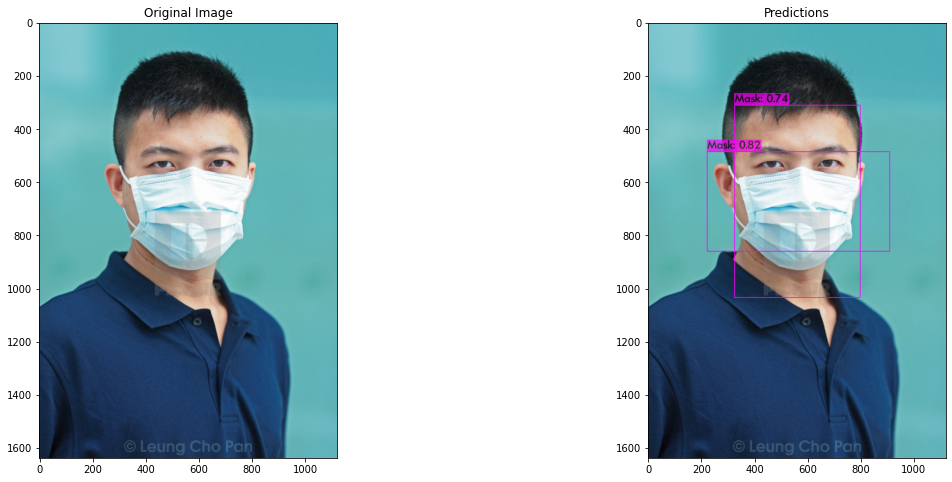

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 70 K-images (1 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
../FaceMask_Code/test-image2.jpg: Predicted in 77.434000 milli-seconds.
Mask: 97%
Mask: 96%
Mask: 89%
No Mask: 88%
Mask: 90%


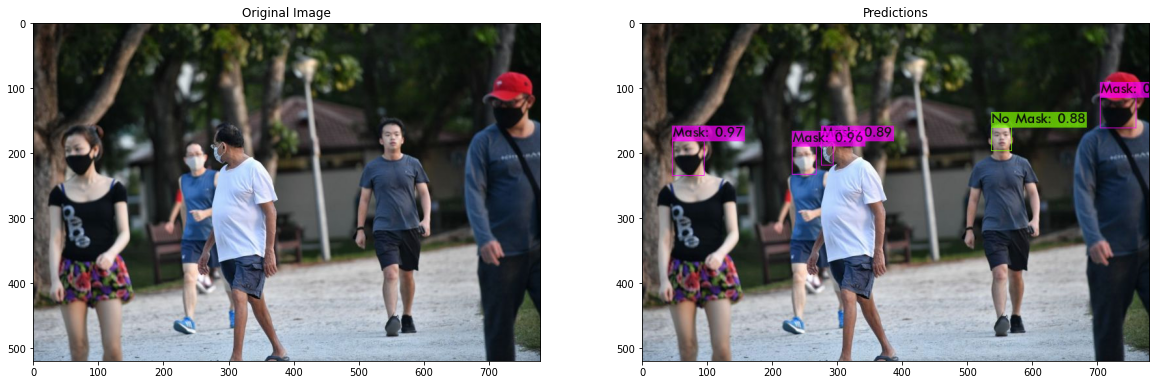

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 70 K-images (1 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
../FaceMask_Code/test-image3.jpg: Predicted in 77.503000 milli-seconds.
Mask: 96%
Mask: 84%
No Mask: 74%
Mask: 97%
Mask: 93%
Mask: 94%
Mask: 95%
Mask: 97%
Mask: 88%
Mask: 91%
Mask: 84%
Mask: 97%
Mask: 91%
Mask: 98%
Mask: 98%
Mask: 92%
Mask: 95%
Mask: 95%


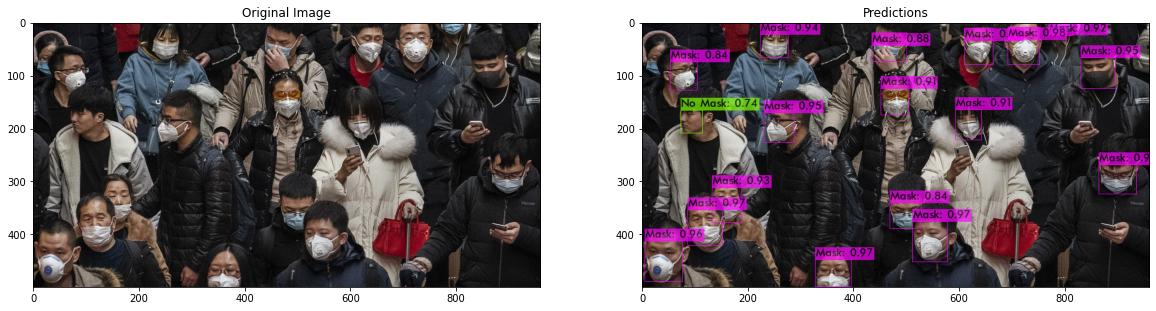

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 70 K-images (1 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
../FaceMask_Code/test-image4.jpg: Predicted in 77.409000 milli-seconds.
No Mask: 61%
No Mask: 64%
Mask: 95%
Mask: 80%
Mask: 98%
No Mask: 88%
Mask: 96%
No Mask: 69%
Mask: 97%


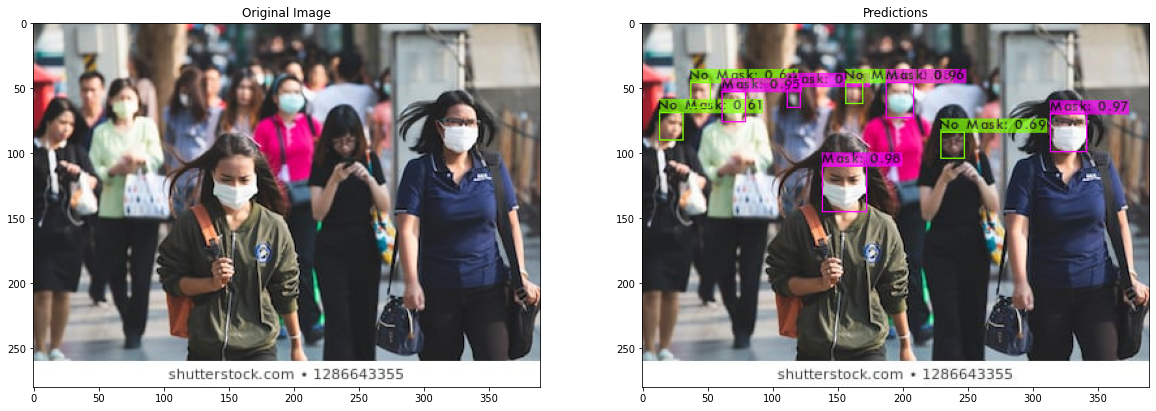

In [10]:
for i in range(1, 5):
  test_image = '../FaceMask_Code/test-image{}.jpg'.format(i)
  !./darknet detector test ../FaceMask_Code/yolov4/yolov4-face-mask-setup.data ../FaceMask_Code/yolov4/yolov4-face-mask-test.cfg ../FaceMask_Code/yolov4/backup/yolov4-face-mask-train_best.weights {test_image} -thresh .6 2> /dev/null
  display_output(test_image)

In [ ]:
!./darknet detector demo ../FaceMask_Code/yolov4/yolov4-face-mask-setup.data ../FaceMask_Code/yolov4/yolov4-face-mask-test.cfg ../FaceMask_Code/yolov4/backup/yolov4-face-mask-train_best.weights ../FaceMask_Code/test-video1.mp4 -thresh .7 -out_filename ../FaceMask_Code/yolov4_out-vid1.avi -dont_show

In [ ]:
!./darknet detector demo ../FaceMask_Code/yolov4/yolov4-face-mask-setup.data ../FaceMask_Code/yolov4/yolov4-face-mask-test.cfg ../FaceMask_Code/yolov4/backup/yolov4-face-mask-train_best.weights ../FaceMask_Code/test-video2.mp4 -thresh .7 -out_filename ../FaceMask_Code/yolov4_out-vid2.avi -dont_show